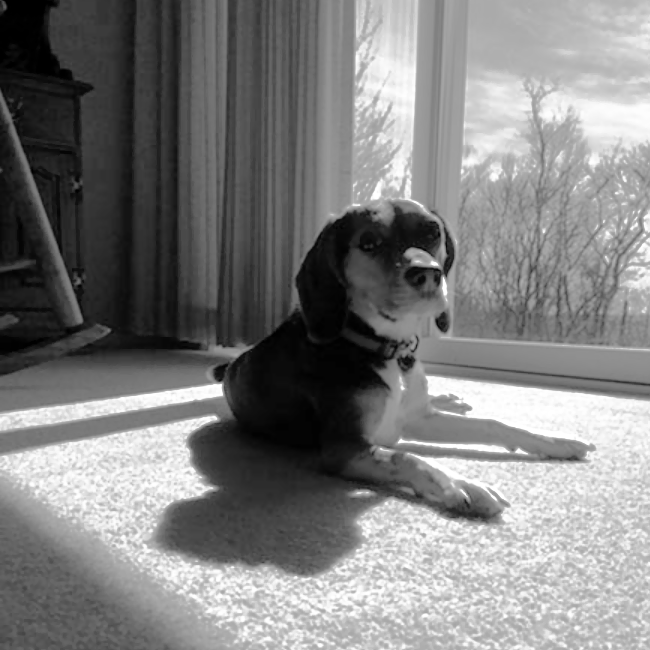

In [1]:
# Computer Vision & Pattern Recognition
# Assignment 2
# Mürsel Sinan Ayaz and Sofia Talancon


# Set the stage
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math

# Read and view an image
A = cv2.imread("dog.png", cv2.IMREAD_GRAYSCALE)
L = 256
cv2_imshow(A)

# Get height and width of image
M = A.shape[0]
N = A.shape[1]




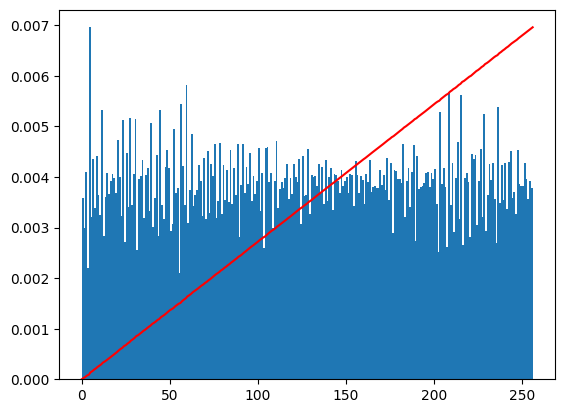

In [2]:
# Normalized histogram and discrete cumulative distribution function
P, bins, ignored = plt.hist(A.ravel(), L, [0,L], density=True)

Pbar = np.zeros((L+1))
for i in range(1,L+1):
  Pbar[i] = Pbar[i-1] + P[i-1]
plt.plot(range(0,L+1), Pbar*max(P), color='r')
plt.show()

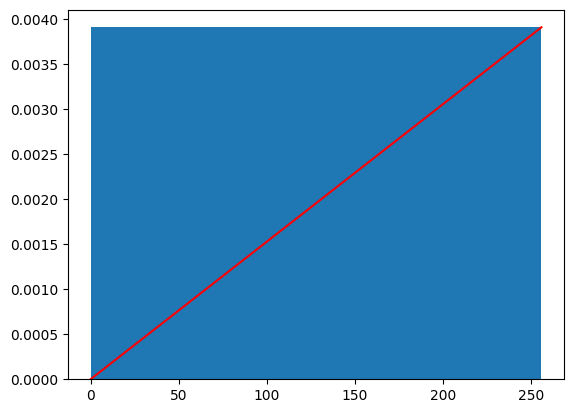

In [3]:
#Exercise 2 part 1

X = np.linspace(0,L,L)

Q, bins, ignored = plt.hist(X.ravel(), L, [0,L], density=True)

Qbar = np.zeros((L+1))
for i in range(1,L+1):
  Qbar[i] = Qbar[i-1] + Q[i-1]

plt.plot(range(0,L+1),Qbar*max(Q),color='r')
plt.show()



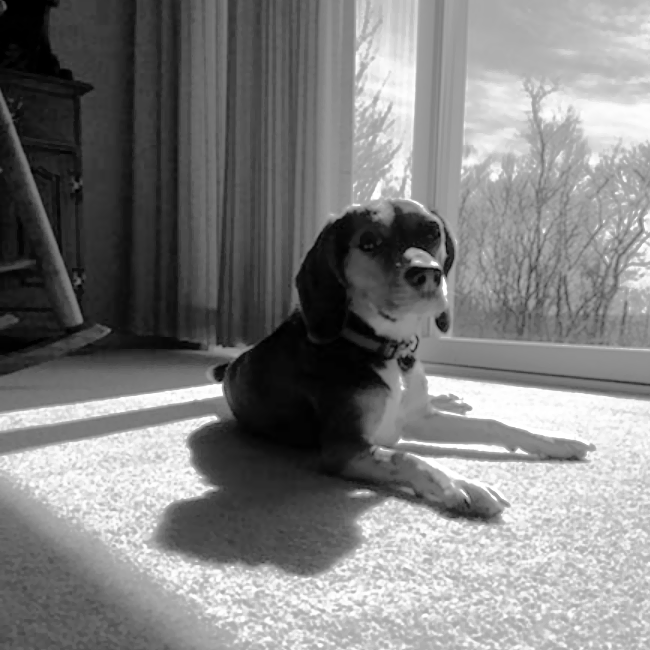

In [5]:

# Histogram matching
C = np.zeros((M,N))
for i in range(0,M):
  for j in range(0,N):

    k = np.array(A[max(i-1,0):min(i+2,M),max(j-1,0):min(j+2,N)], dtype='int')
    temp = []

    for ind_i in range(0, k.shape[0]):
        for ind_j in range(0, k.shape[1]):
            if (abs(A[i,j] - k[ind_i,ind_j])<=2):
                temp.append(k[ind_i,ind_j])

    k = np.mean(temp) + 0.5

    k_w1 = k - math.floor(k)
    k_w2 = 1 - k_w1

    z = k_w2 * Pbar[math.floor(k)] + k_w1 * Pbar[math.ceil(k)]
    m = 0
    while Qbar[m+1] < z:
      m = m + 1
    Ls = m + (z-Qbar[m]) / Q[m]
    C[i,j] = np.round(Ls - 0.5)
cv2_imshow(C)

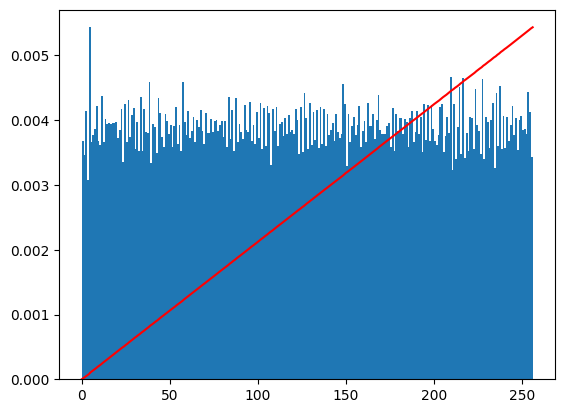

0.06126575443786982


In [6]:
# Histogram and discrete cumulative distribution function of the result
R, bins, ignored = plt.hist(C.ravel(), L, [0,L], density=True)
Rbar = np.zeros((L+1))
for i in range(1,L+1):
  Rbar[i] = Rbar[i-1] + R[i-1]
plt.plot(range(0,L+1),Rbar*max(R),color='r')
plt.show()
print(abs(R-Q).sum())